In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


In [78]:
df = pd.read_csv('C:/data set/data_sesar.csv')

In [79]:
print(df.head())

   Age  Delivey No Delivery No Blood of Pressure Heart Problem Caesarian
0   22           1      Timely              High           apt        No
1   26           2      Timely            Normal           apt       Yes
2   26           2   Premature            Normal           apt        No
3   28           1      Timely              High           apt        No
4   22           2      Timely            Normal           apt       Yes


In [80]:
# Daftar kolom kategorikal yang ingin diubah
categorical_columns = ['Delivery No', 'Blood of Pressure', 'Heart Problem', 'Caesarian']

In [81]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [82]:
# Iterasi melalui daftar kolom kategorikal dan ubah menjadi numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [83]:
# Menampilkan beberapa baris pertama dari DataFrame untuk verifikasi
df

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,2,0,0,0
1,26,2,2,2,0,1
2,26,2,1,2,0,0
3,28,1,2,0,0,0
4,22,2,2,2,0,1
...,...,...,...,...,...,...
75,27,2,1,2,0,0
76,33,4,2,2,0,1
77,29,2,1,0,0,1
78,25,1,0,1,0,1


In [84]:
# Cek missing values
print(df.isnull().sum())


Age                  0
Delivey No           0
Delivery No          0
Blood of Pressure    0
Heart Problem        0
Caesarian            0
dtype: int64


In [85]:
# Jika ada missing values, hapus baris yang mengandung missing values
df.dropna(inplace=True)


In [86]:
# Definisikan fitur dan target
X = df.drop("Caesarian", axis=1)
y = df["Caesarian"]


In [92]:
# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

In [94]:
# Melatih model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [95]:
# Prediksi dengan data uji
y_pred = model.predict(X_test)


In [97]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.625


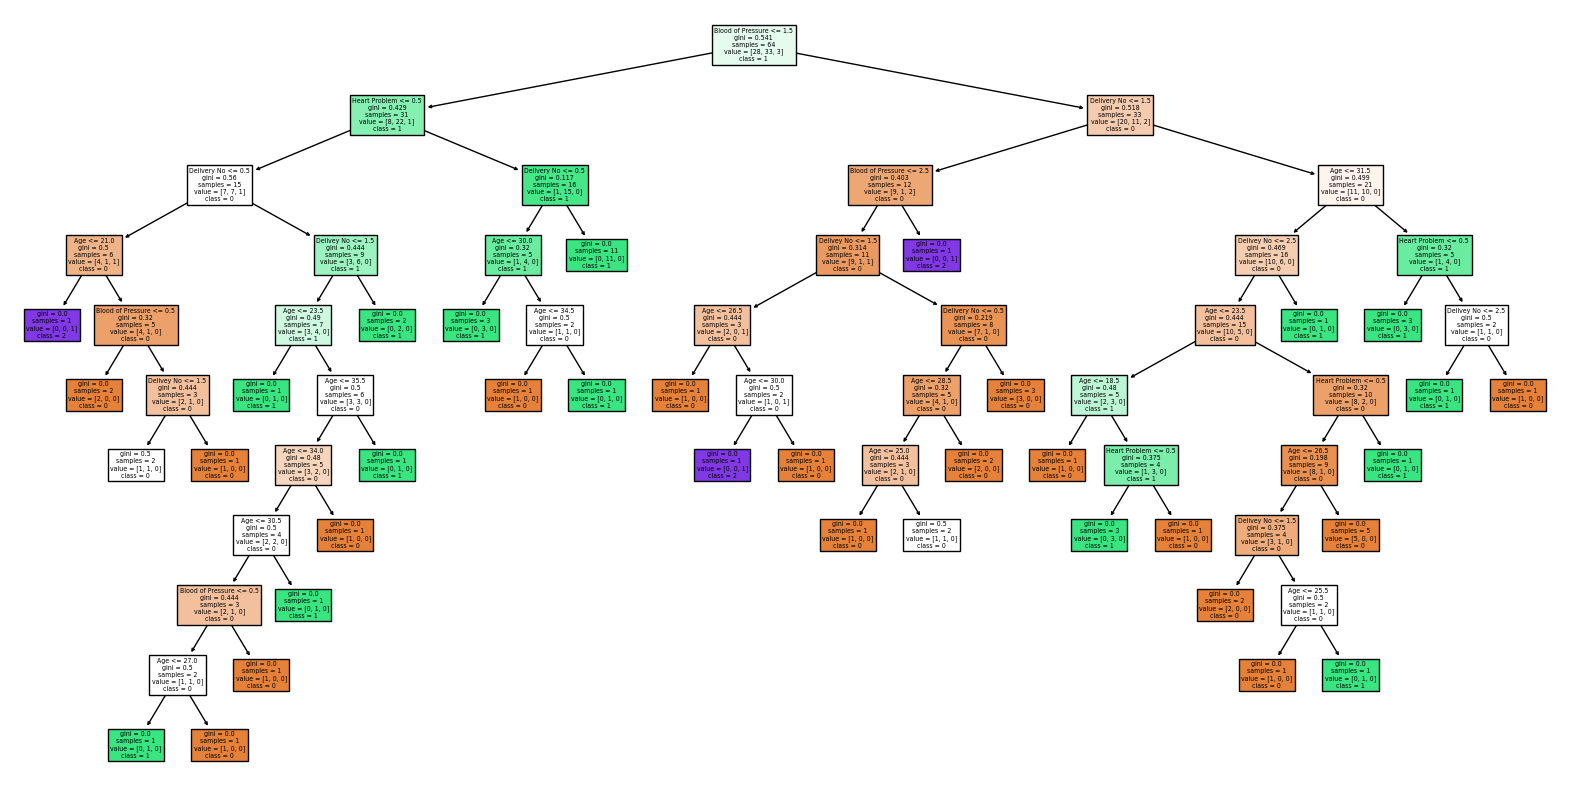

In [98]:
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.show()